<a href="https://colab.research.google.com/github/Nithyavaishu16/aiml-training-2024/blob/main/AIML_III_Module_01_Lab_02_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=2)

In [2]:
dataset = datasets.fetch_california_housing()
#dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [4]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [6]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [7]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4164
Number of train samples: 16476
Percent of test data: 20.174418604651162 %


# Experiments with splits

In [10]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 50 / 100)

What is the accuracy of our classifiers on the train dataset?

In [11]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.832283082888996 %


In [12]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 32.842898832684824 %
Validation accuracy using random classifier: 16.913910505836576 %


In [13]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 50 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 32.48407643312102 %


In [14]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*70, "%")

Test accuracy: 24.9135446685879 %


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load example dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
validation_size = 0.2  # 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_size, random_state=42)

# Train the model on the training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.2f}')


Validation Accuracy: 0.96
Test Accuracy: 1.00


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load example dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
validation_size = 0.2  # 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=validation_size, random_state=42)

# Train the 1-NN classifier on the training set
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(X_train, y_train)

# Train the 3-NN classifier on the training set
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(X_train, y_train)

# Evaluate the 1-NN classifier on the validation set
val_predictions_1nn = model_1nn.predict(X_val)
val_accuracy_1nn = accuracy_score(y_val, val_predictions_1nn)
print(f'1-NN Validation Accuracy: {val_accuracy_1nn:.2f}')

# Evaluate the 3-NN classifier on the validation set
val_predictions_3nn = model_3nn.predict(X_val)
val_accuracy_3nn = accuracy_score(y_val, val_predictions_3nn)
print(f'3-NN Validation Accuracy: {val_accuracy_3nn:.2f}')

# Evaluate the 1-NN classifier on the test set
test_predictions_1nn = model_1nn.predict(X_test)
test_accuracy_1nn = accuracy_score(y_test, test_predictions_1nn)
print(f'1-NN Test Accuracy: {test_accuracy_1nn:.2f}')

# Evaluate the 3-NN classifier on the test set
test_predictions_3nn = model_3nn.predict(X_test)
test_accuracy_3nn = accuracy_score(y_test, test_predictions_3nn)
print(f'3-NN Test Accuracy: {test_accuracy_3nn:.2f}')


1-NN Validation Accuracy: 0.92
3-NN Validation Accuracy: 0.92
1-NN Test Accuracy: 1.00
3-NN Test Accuracy: 1.00


# Multiple splits

One way to get more accurate estimates for the test accuracy is by using cross-validation. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [17]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [18]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.653023773802204 %
Test accuracy: 35.590778097982714 %


# Questions

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load example dataset
data = load_iris()
X, y = data.data, data.target

# Initialize the classifiers
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_3nn = KNeighborsClassifier(n_neighbors=3)

# Perform 5-fold cross-validation
cv_folds = 5

# Cross-validation for 1-NN
cv_scores_1nn = cross_val_score(model_1nn, X, y, cv=cv_folds)
mean_cv_accuracy_1nn = np.mean(cv_scores_1nn)
print(f'1-NN Cross-Validation Accuracy (mean of {cv_folds} folds): {mean_cv_accuracy_1nn:.2f}')

# Cross-validation for 3-NN
cv_scores_3nn = cross_val_score(model_3nn, X, y, cv=cv_folds)
mean_cv_accuracy_3nn = np.mean(cv_scores_3nn)
print(f'3-NN Cross-Validation Accuracy (mean of {cv_folds} folds): {mean_cv_accuracy_3nn:.2f}')

# Train and test final models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_1nn.fit(X_train, y_train)
test_accuracy_1nn = model_1nn.score(X_test, y_test)
print(f'1-NN Test Accuracy: {test_accuracy_1nn:.2f}')

model_3nn.fit(X_train, y_train)
test_accuracy_3nn = model_3nn.score(X_test, y_test)
print(f'3-NN Test Accuracy: {test_accuracy_3nn:.2f}')


1-NN Cross-Validation Accuracy (mean of 5 folds): 0.96
3-NN Cross-Validation Accuracy (mean of 5 folds): 0.97
1-NN Test Accuracy: 1.00
3-NN Test Accuracy: 1.00


# Exercise

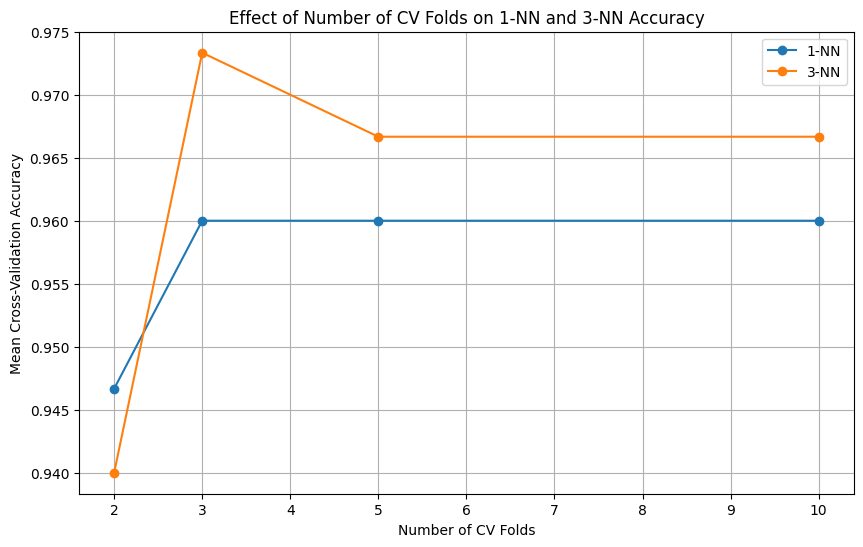

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load example dataset
data = load_iris()
X, y = data.data, data.target

# Initialize the classifiers
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_3nn = KNeighborsClassifier(n_neighbors=3)

# List of different numbers of folds for cross-validation
cv_folds_list = [2, 3, 5, 10]

# Store mean cross-validation accuracies for each number of folds
mean_cv_accuracies_1nn = []
mean_cv_accuracies_3nn = []

for cv_folds in cv_folds_list:
    # Cross-validation for 1-NN
    cv_scores_1nn = cross_val_score(model_1nn, X, y, cv=cv_folds)
    mean_cv_accuracies_1nn.append(np.mean(cv_scores_1nn))

    # Cross-validation for 3-NN
    cv_scores_3nn = cross_val_score(model_3nn, X, y, cv=cv_folds)
    mean_cv_accuracies_3nn.append(np.mean(cv_scores_3nn))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cv_folds_list, mean_cv_accuracies_1nn, marker='o', label='1-NN')
plt.plot(cv_folds_list, mean_cv_accuracies_3nn, marker='o', label='3-NN')
plt.xlabel('Number of CV Folds')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Effect of Number of CV Folds on 1-NN and 3-NN Accuracy')
plt.legend()
plt.grid(True)
plt.show()
